# Voice Gender Classification Neural Network

#### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

%matplotlib inline

#### Reading labeled data file

In [2]:
audio_data = np.load("audio_data.npy")

# 1440 files: 24 speakers, 60 recordings per speaker
# alternate male/female so can accurately label gender of speaker with if statement below
audio_data = audio_data.reshape(1440, 9480)

features = []

for i in range(1440):
    if (i<60 or (i>120 and i<180) or (i>240 and i<300) or (i>360 and i<420) or (i>480 and i<540) or
        (i>600 and i<660) or (i>720 and i<780) or (i>840 and i<900) or (i>960 and i<1020) or (i>1080 and i<1140)
        or (i>1200 and i<1260) or (i>1320 and i<1380)):
        label = "Male" 
    else:
        label = "Female"
    
    features.append([audio_data[i], label])


    
feature_df = pd.DataFrame(features, columns = ["mfcc", "gender"])

feature_df.head()

,mfcc,gender
0,"[-855.3770751953125, -855.3770751953125, -855....",Male
1,"[-850.3917236328125, -850.435791015625, -850.4...",Male
2,"[-849.78369140625, -848.8447265625, -848.56610...",Male
3,"[-842.9385375976562, -843.2474975585938, -850....",Male
4,"[-911.1758422851562, -910.4053344726562, -905....",Male


In [3]:
#split testing and training data
X = np.array(feature_df.mfcc.tolist())
Y = np.array(feature_df.gender.tolist())

#20-80 train-test split
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, Y, test_size=0.20, random_state=0)

In [4]:
#regularization
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#Training and Predictions
mlp = MLPClassifier(hidden_layer_sizes=(5, 5, 5), max_iter=1000)
mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)

Gender Classification
   Male  Female
0   145       3
1     0     140


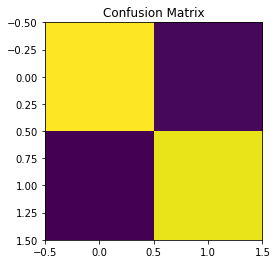

Classification by Gender Precision: 0.9895104895104896
              precision    recall  f1-score   support

      Female       1.00      0.98      0.99       148
        Male       0.98      1.00      0.99       140

    accuracy                           0.99       288
   macro avg       0.99      0.99      0.99       288
weighted avg       0.99      0.99      0.99       288



In [9]:
#Algorithm Evaluation
cm = confusion_matrix(y_test,predictions)
print("Gender Classification")
df = pd.DataFrame(cm, columns=[Y[0], Y[60]])
print(df)

#figure for confusion matrix
conf_matrix = confusion_matrix(y_test,predictions)
plt.figure(figsize=(10,4))
plt.imshow(conf_matrix)
plt.title("Confusion Matrix")
plt.show()

#precision function
def precision(confmatrix):
    # precision = tp/(tp+fp)
    tp = np.diag(confmatrix)
    fp = np.sum(confmatrix, axis=0) - tp
    precision = np.mean(tp/(tp+fp))
    return precision

prec = precision(cm)

print("Classification by Gender Precision: " + str(prec))

print(classification_report(y_test,predictions))